## CAB420 Final Assignment


# Importing Library and Read Data from CSV files


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


# Spliting data to trainning and testing set
from sklearn.model_selection import train_test_split
# Fitting Multiple Linear Regression to the trainning set
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

# Import dataset
rating_dataset = pd.read_csv("ratings.csv")
movies_dataset = pd.read_csv("movies.csv")

# Set the index by movieId, This line of code only able to execute once
movies_dataset.set_index('movieId', inplace = True)

# Convert genres to dummy variable dataset
genresDummy = movies_dataset['genres'].str.get_dummies(sep='|')

In [2]:
# Get all the genres values from the dataset
def get_all_genres():
    # a variable contains all the genre types
    genres = list()

    for row in movies_dataset.values:
        #  Sperating the genre by |
        Typestemp = row[1].split('|')
        #  Read all these type and put it to list
        for movietype in Typestemp:
            genres.append(movietype)
    return set(genres)

In [3]:
# Add the dummy data back to the dataset
for genre in get_all_genres():
    movies_dataset[genre] = genresDummy[genre]
    
# Filtering duplicate values in the MovieGenre list
movies_dataset = movies_dataset.drop(columns=['genres', 'title'], axis=1)

In [4]:
full_rating_dataset = pd.merge(rating_dataset[["userId","movieId","timestamp", "rating"]], movies_dataset, on='movieId', how="left")

# Creating parameters from Rating Dataset
# y = rating_dataset.loc[:, ["rating"]]

full_rating_dataset

,userId,movieId,timestamp,rating,Mystery,Film-Noir,Children,Western,Comedy,Adventure,...,Animation,Fantasy,Action,IMAX,Horror,War,Romance,Thriller,Drama,Sci-Fi
0,1,2,1112486027,3.5,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,29,1112484676,3.5,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
2,1,32,1112484819,3.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,47,1112484727,3.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,50,1112484580,3.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,112,1094785740,3.5,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
6,1,151,1094785734,4.0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
7,1,223,1112485573,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,253,1112484940,4.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,1,260,1112484826,4.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [10]:
X = full_rating_dataset.drop(columns=['rating'], axis=1).values
y = full_rating_dataset.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)


In [15]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.44421670e-08 -5.90857515e-07 -4.42501896e-11  1.27028084e-01
  2.76170791e-01 -3.02398206e-01  5.61381710e-02 -1.08827313e-01
  8.93678327e-02  1.89315795e-01 -3.30792210e-01  2.81647043e-01
  5.19063890e-02  3.19988329e-01  6.17840678e-02 -1.30527910e-01
  1.33284921e-01 -2.06693151e-01  2.45721840e-01  1.38223448e-02
 -4.33205981e-02  1.92616895e-01  1.09495006e-02]
Mean squared error: 1.07
Variance score: 0.04


ValueError: x and y must be the same size

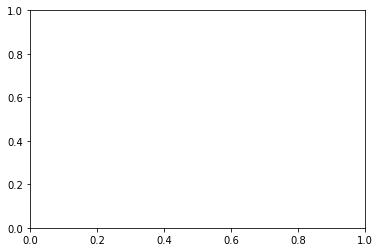

In [8]:
def predict_Rating_For_One_User(rating_dataset):
    # Randomly Generate a user for doing linear regression to predict what will he / she giving the rating on a movie
    userID = random.randint(1, full_rating_dataset['userId'].max() + 1)
    
    # Set the index by movieId, This line of code only able to execute once
    rating_dataset.set_index('userId', inplace = True)
    
    user_rating_dataset = rating_dataset.loc[userID,:]
    
    # Rating
    X = user_rating_dataset.drop(columns=['rating'], axis=1).values
    y = user_rating_dataset.iloc[:,2].values
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)

    y_pred = regressor.predict(X_test)
    print("Prediction : ")
    print(y_pred)
    print("True Value is :")
    print(y_tes)
    

In [9]:
# Backward Elimination
import statsmodels.formula.api as sm 
X_train_row = X_train.shape[0]

# Add 1 to Xtrain represent parameter0
X_train = np.append(arr = np.ones((X_train_row,1)), values = X_train, axis = 1)

X_train

array([[1.00000e+00, 8.57300e+04, 2.95900e+03, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.41220e+04, 1.70200e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.31624e+05, 3.17300e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 1.50300e+04, 3.61500e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.26300e+05, 5.67880e+04, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00000e+00, 5.74730e+04, 8.99000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])